In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pyicon as pyic

----Start loading pyicon.
----Start loading pyicon.
----Pyicon was loaded successfully.
----Pyicon was loaded successfully.


In [2]:
with open('./path_data.txt') as f:
    path_data = f.read()[:-1]
fpath_fx = f'{path_data}/r2b4_oce_r0004/r2b4_oce_r0004_L40_fx.nc'

In [3]:
ds = xr.open_mfdataset(f'{path_data}/outdata/*oce*3d*.nc')

## Horizontal plots

### Quickest plot

(<GeoAxesSubplot:title={'left':'depth = 6.0 m','right':'2200-01-31T23:00:00'}>,
  <matplotlib.colorbar.Colorbar at 0x7fff9012ad10>])

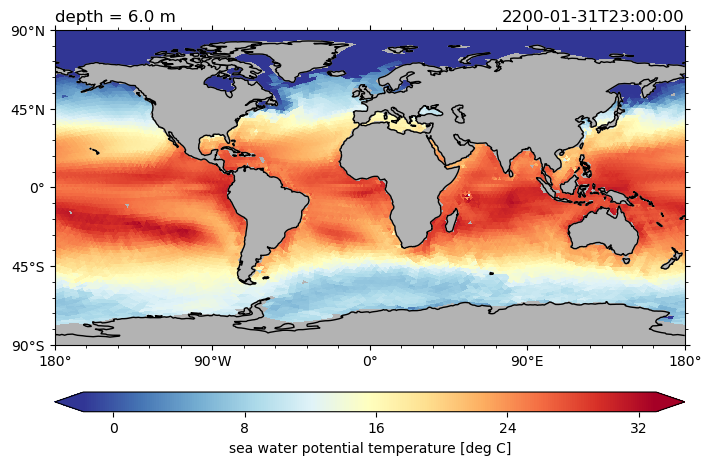

In [4]:
ds.to.isel(depth=0, time=0).pyic.plot()

### Specifying axes

Text(0, 0.5, '[deg C]')

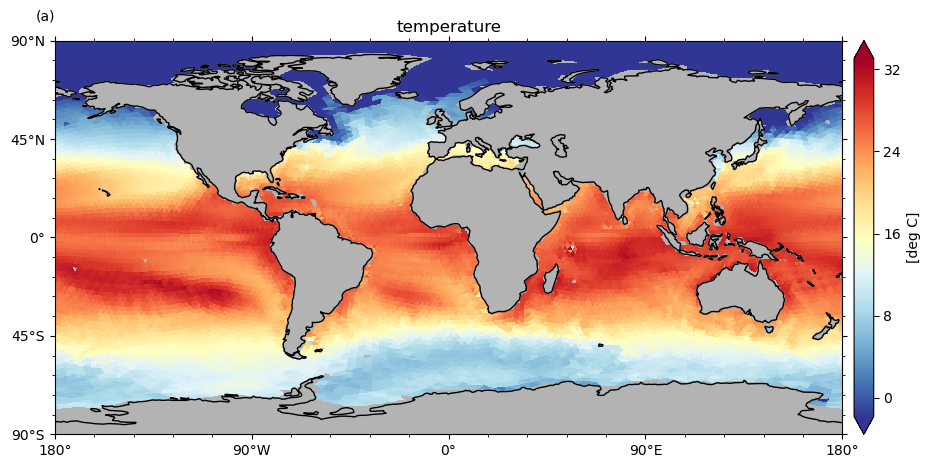

In [5]:
P = pyic.Plot(1, 1, projection=ccrs.PlateCarree(), fig_size_fac=2.5)
P.plot(ds.to.isel(depth=0, time=0))

P.ax.set_title('temperature')
P.ax.set_title('', loc='right')
P.ax.set_title('', loc='left')

P.cax.set_ylabel('[deg C]')

### Global map accross dateline

(<GeoAxesSubplot:title={'left':'depth = 6.0 m','right':'2200-01-31T23:00:00'}>,
  <matplotlib.colorbar.Colorbar at 0x7fff82c48220>])

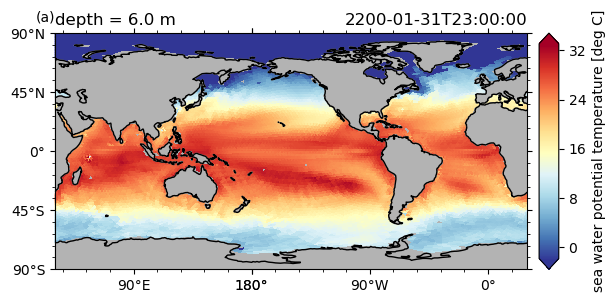

In [6]:
P = pyic.Plot(1, 1, projection=ccrs.PlateCarree(central_longitude=210.))
P.plot(ds.to.isel(depth=0, time=0))

### Different projection

::: WARNING: There is a strange error of Cartopy when using xlim=[-180,180] and projections like EqualEarth, Robinson,...! :::
Continuing with xlim=[-179.9, 179.9]


(<GeoAxesSubplot:title={'left':'depth = 6.0 m','right':'2200-01-31T23:00:00'}>,
  <matplotlib.colorbar.Colorbar at 0x7fff82bd2470>])

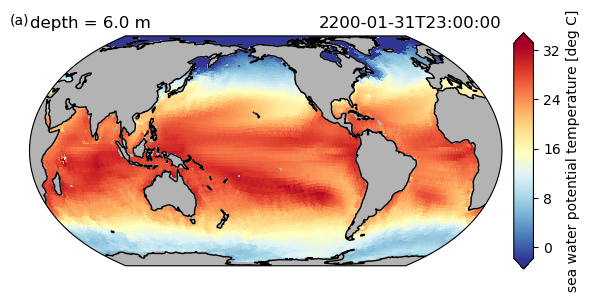

In [7]:
P = pyic.Plot(1, 1, projection=ccrs.EqualEarth(central_longitude=210.))
P.plot(ds.to.isel(depth=0, time=0), template='global')

### Scatter plot

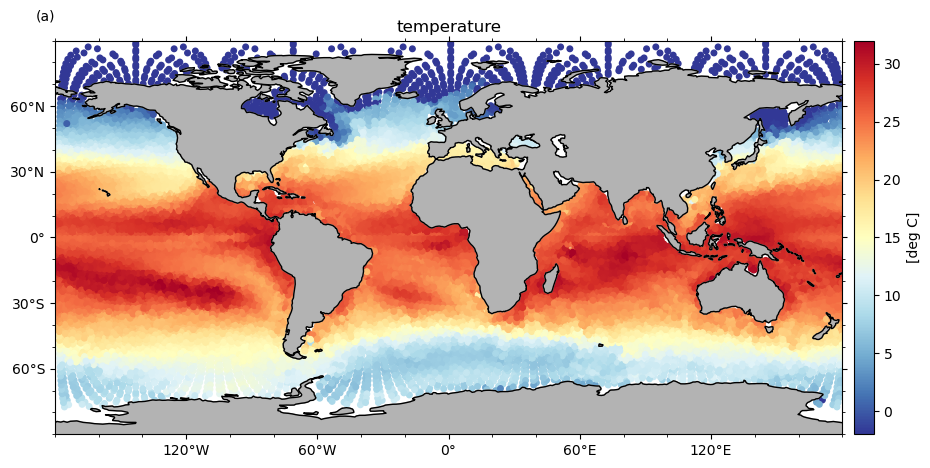

In [8]:
P = pyic.Plot(1, 1, projection=ccrs.PlateCarree(), fig_size_fac=2.5)
P.next()
nskip = 1
da = ds.to.isel(depth=0, time=0)
da = da.where(da!=0)
hm = P.ax.scatter(ds.clon[::nskip]*180./np.pi, ds.clat[::nskip]*180./np.pi, c=da[::nskip], vmin=-2, vmax=32, s=16, cmap='RdYlBu_r')
plt.colorbar(mappable=hm, cax=P.cax)

P.ax.set_title('temperature')
P.ax.set_title('', loc='right')
P.ax.set_title('', loc='left')

P.cax.set_ylabel('[deg C]')

pyic.plot_settings(ax=P.ax, template='global')

### Regional plots

(<GeoAxesSubplot:title={'left':'depth = 6.0 m','right':'2200-01-31T23:00:00'}>,
  <matplotlib.colorbar.Colorbar at 0x7fff8126c5b0>])

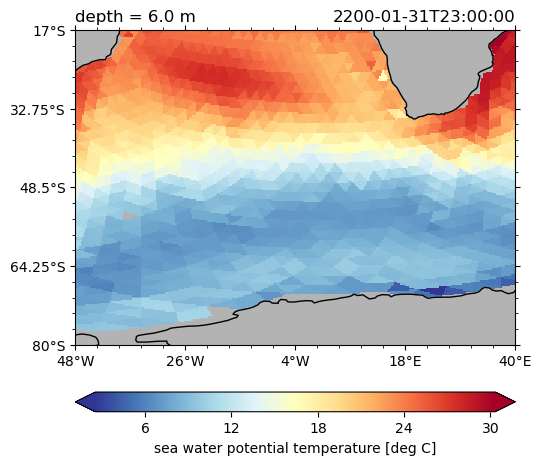

In [9]:
ds.to.isel(depth=0, time=0).pyic.plot(lon_reg=[-48,40], lat_reg=[-80,-17])

### Regional plot across dateline

(<GeoAxesSubplot:title={'left':'depth = 6.0 m','right':'2200-01-31T23:00:00'}>,
  <matplotlib.colorbar.Colorbar at 0x7fff81185e10>])

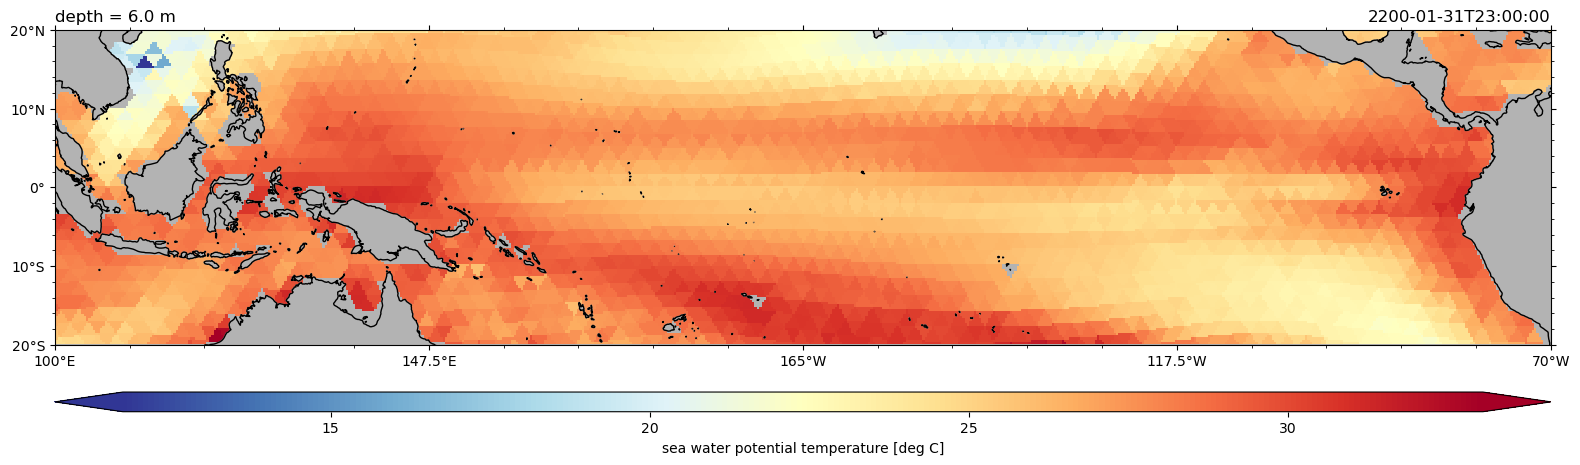

In [10]:
ds.to.isel(depth=0, time=0).pyic.plot(lon_reg=[100,-70], lat_reg=[-20,20])

### Regional plots: North Polar

(<GeoAxesSubplot:title={'left':'depth = 6.0 m','right':'2200-01-31T23:00:00'}>,
  <matplotlib.colorbar.Colorbar at 0x7fff80c31c90>])

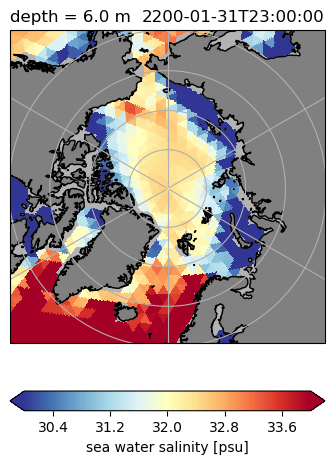

In [11]:
ds.so.isel(depth=0, time=0).pyic.plot(projection='np', clim=[30,34], do_gridlines=True, land_facecolor='0.5', xticks=np.arange(-180.,180.,60.))

### Regional plots: South Polar

(<GeoAxesSubplot:title={'left':'depth = 6.0 m','right':'2200-01-31T23:00:00'}>,
  <matplotlib.colorbar.Colorbar at 0x7fff80b0ed70>])

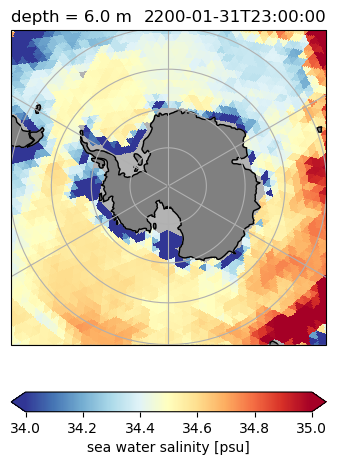

In [12]:
ds.so.isel(depth=0, time=0).pyic.plot(projection='sp', clim=[34,35], do_gridlines=True, land_facecolor='0.5', xticks=np.arange(-180.,180.,60.))

## Sections and global zonal averages

(<AxesSubplot:title={'left':'170W','right':'2200-01-31T23:00:00'}, xlabel='latitude', ylabel='depth / m'>,
  <matplotlib.colorbar.Colorbar at 0x7fff808fcdc0>])

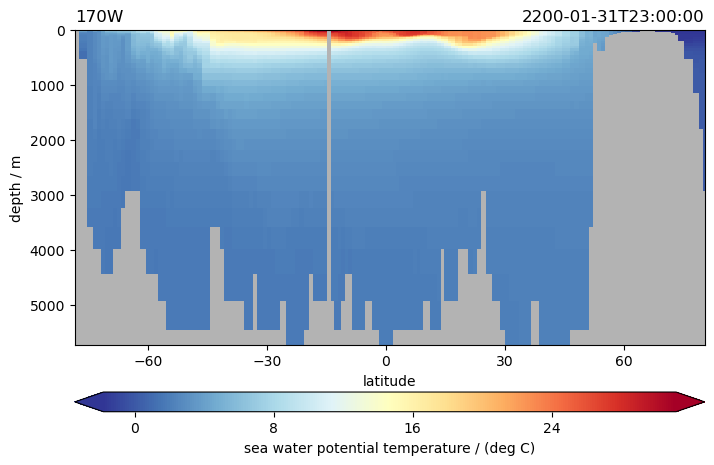

In [13]:
ds.to.isel(time=0).pyic.plot_sec(section='170W')

(<AxesSubplot:title={'left':'30W','right':'2200-01-31T23:00:00'}, xlabel='latitude', ylabel='depth / m'>,
  <matplotlib.colorbar.Colorbar at 0x7fff809a70a0>])

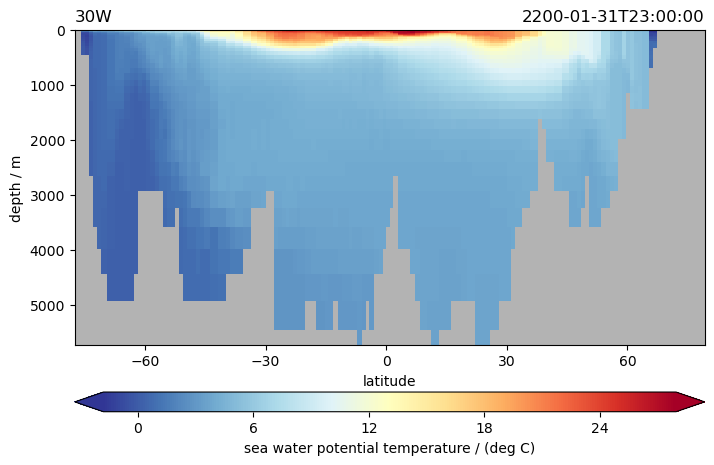

In [14]:
ds.to.isel(time=0).pyic.plot_sec(section='30W')

(<AxesSubplot:title={'left':'gzave','right':'2200-01-31T23:00:00'}, xlabel='latitude', ylabel='depth / m'>,
  <matplotlib.colorbar.Colorbar at 0x7fff808e1de0>])

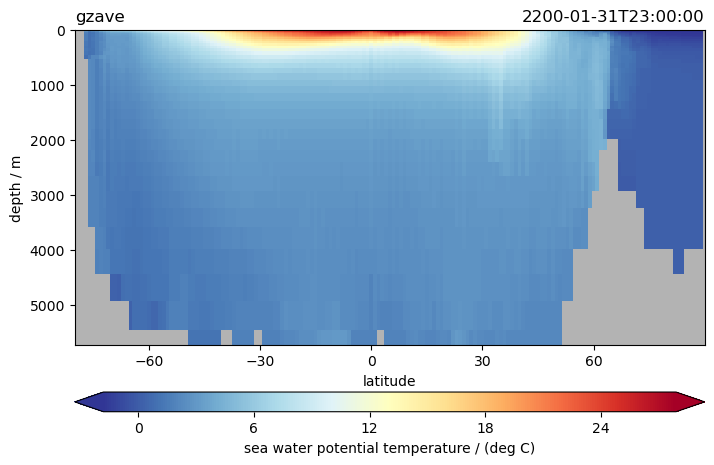

In [15]:
ds.to.isel(time=0).pyic.plot_sec(section='gzave')

## Meridional overturning plots

In [16]:
ds_moc = xr.open_mfdataset(f'{path_data}/outdata/*oce*moc*.nc')

In [17]:
da_amoc = ds_moc.atlantic_moc.isel(time=slice(0,12)).mean(dim='time', keep_attrs=True).compute()

(<AxesSubplot:xlabel='latitude', ylabel='depth / m'>,
  <matplotlib.colorbar.Colorbar at 0x7fff80510100>])

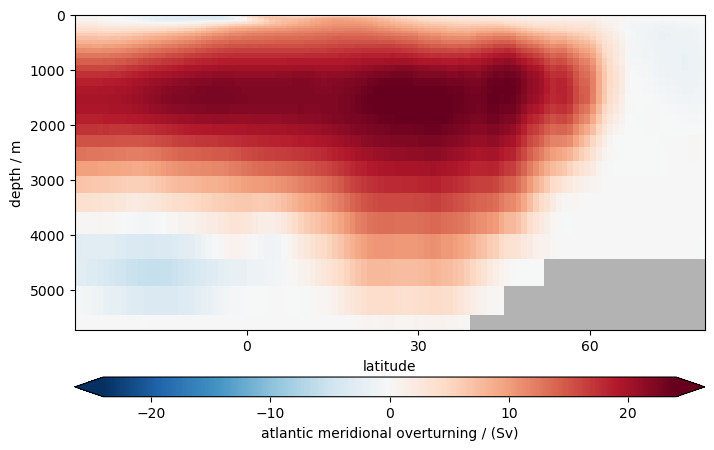

In [18]:
da_amoc.pyic.plot_sec(section='moc', clim=24, xlim=[-30,80])

## Mixture of plots

(<AxesSubplot:title={'left':'170W','right':'2200-01-31T23:00:00'}, xlabel='latitude', ylabel='depth / m'>,
  <matplotlib.colorbar.Colorbar at 0x7fff803542b0>])

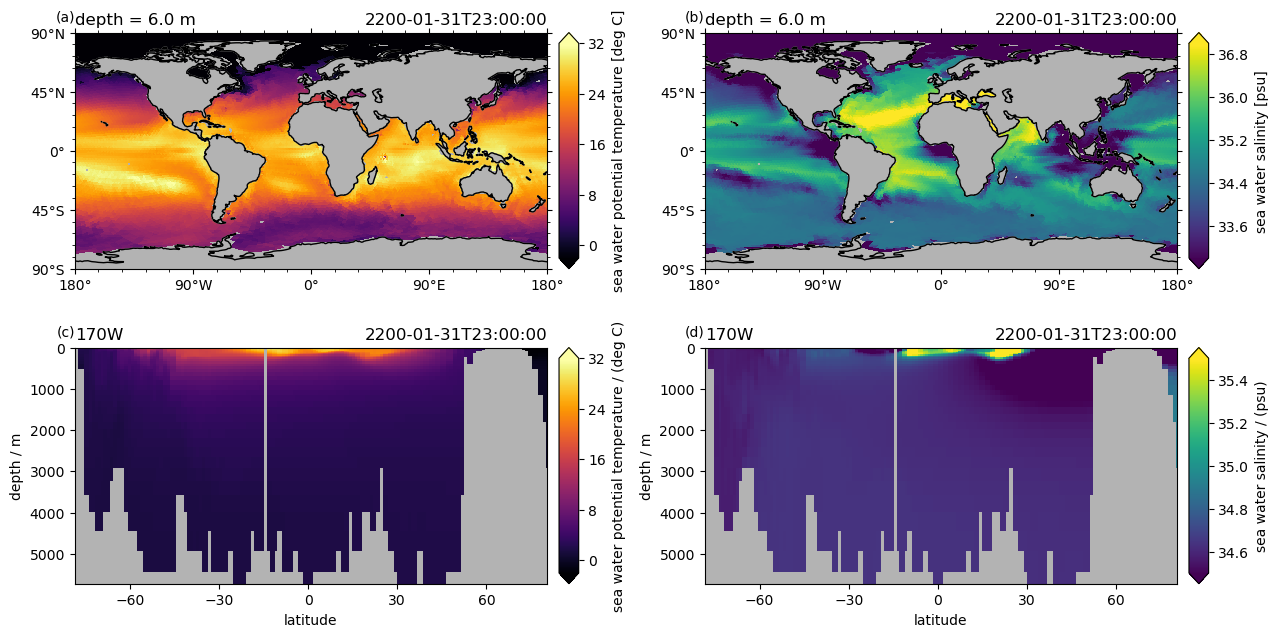

In [19]:
P = pyic.Plot(2, 2, 
              projection=[ccrs.PlateCarree(), ccrs.PlateCarree(), None, None],
              sharex=False, sharey=False)

P.next()
P.plot(ds.to.isel(depth=0, time=0), clim=[-2, 32], cmap='inferno')

P.next()
P.plot(ds.so.isel(depth=0, time=0), clim=[33,37], cmap='viridis')

P.next()
P.plot_sec(ds.to.isel(time=0), clim=[-2, 32], cmap='inferno', section='170W')

P.next()
P.plot_sec(ds.so.isel(time=0), clim=[34.5, 35.5], cmap='viridis', section='170W')

(<AxesSubplot:title={'left':'ipzave','right':'2200-01-31T23:00:00'}, xlabel='latitude', ylabel='depth / m'>,
  <matplotlib.colorbar.Colorbar at 0x7fff7877cdc0>])

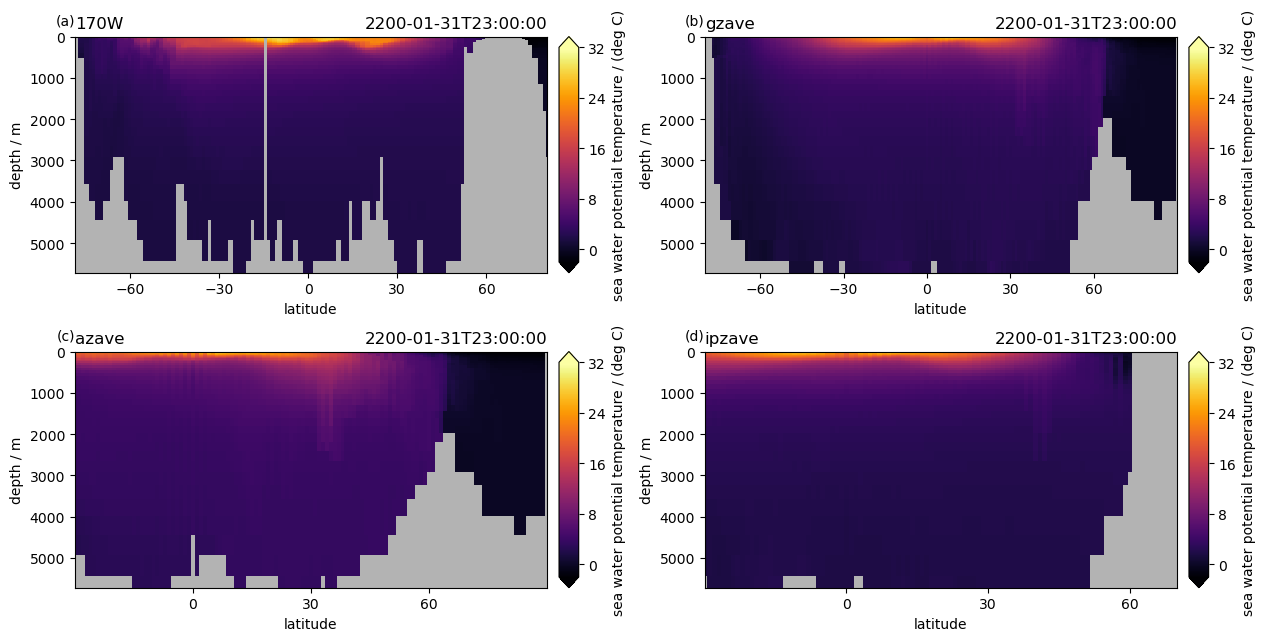

In [20]:
P = pyic.Plot(2, 2, 
              projection=[None, None, None, None],
              sharex=False, sharey=False)

P.next()
P.plot_sec(ds.to.isel(time=0), clim=[-2, 32], cmap='inferno', section='170W')

P.next()
P.plot_sec(ds.to.isel(time=0), clim=[-2, 32], cmap='inferno', section='gzave')

P.next()
P.plot_sec(ds.to.isel(time=0), clim=[-2, 32], cmap='inferno', section='azave', fpath_fx=fpath_fx)

P.next()
P.plot_sec(ds.to.isel(time=0), clim=[-2, 32], cmap='inferno', section='ipzave', fpath_fx=fpath_fx)

## Timeseries

In [21]:
ds_ts = xr.open_mfdataset(f'{path_data}/outdata/*oce*mon*.nc')

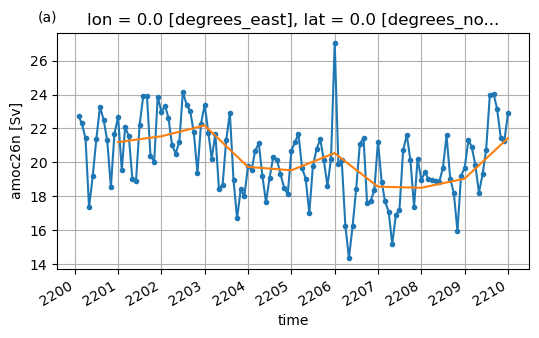

In [22]:
P = pyic.Plot(1,1, plot_cb=False)

ax, cax = P.next()
ds_ts.amoc26n.plot(marker='.')
ds_ts.amoc26n.resample(time='1Y').mean().plot()
ax.grid(True)